In [1]:
# Dependencies
import random
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import requests
from datetime import datetime
# API source
from config import weather_api_key

In [2]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [3]:
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [4]:
# Add the latitudes and longitudes to a list.
#lat_lngs = zip(*lat_lngs)
#coordinates = list(lat_lngs)
lats = np.random.uniform(-90,90,size=1500)
lngs = np.random.uniform(-180,180,size=1500)
lat_lngs = zip(lats,lngs)

for lat_lng in lat_lngs:
    print(lat_lng[0],lat_lng[1])
    break

79.52228458143273 70.7047974891612


In [5]:
# Create list for holding the cities
cities = []

# Identify the nearest city for each lat and long combo
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name
    
    # Filter out dupes
    if city not in cities:
        cities.append(city)
# confirmation
print(len(cities))

615


In [6]:
# URL for Weahter Map API Call

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c777755f1537ae28f437f017b5d96844


In [7]:
query_url = url + "appid" + weather_api_key

In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c777755f1537ae28f437f017b5d96844&q=Boston


In [9]:
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 67.24,
  'feels_like': 66.7,
  'temp_min': 64,
  'temp_max': 71.01,
  'pressure': 1013,
  'humidity': 83},
 'wind': {'speed': 8.05, 'deg': 130},
 'clouds': {'all': 78},
 'dt': 1592873520,
 'sys': {'type': 1,
  'id': 4967,
  'country': 'US',
  'sunrise': 1592816870,
  'sunset': 1592871887},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [10]:
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [11]:
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")
    
boston_data = city_weather.json()

City Weather found.


In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 67.24,
  'feels_like': 66.7,
  'temp_min': 64,
  'temp_max': 71.01,
  'pressure': 1013,
  'humidity': 83},
 'wind': {'speed': 8.05, 'deg': 130},
 'clouds': {'all': 78},
 'dt': 1592873520,
 'sys': {'type': 1,
  'id': 4967,
  'country': 'US',
  'sunrise': 1592816870,
  'sunset': 1592871887},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [14]:
# Get the JSON data.
boston_data = city_weather.json()
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 71.01 83 78 8.05


In [15]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2020-06-23 00:52:00'

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [18]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Processing Record 16 of Set 13 | kavieng
Processing Record 17 of Set 13 | cherskiy
Processing Record 18 of Set 13 | rikitea
Processing Record 19 of Set 13 | ribeira grande
Processing Record 20 of Set 13 | manokwari
Processing Record 21 of Set 13 | portland
Processing Record 22 of Set 13 | ushuaia
Processing Record 23 of Set 13 | dangriga
Processing Record 24 of Set 13 | hilo
Processing Record 25 of Set 13 | ukiah
Processing Record 26 of Set 13 | sambava
Processing Record 27 of Set 13 | faanui
Processing Record 28 of Set 13 | pangnirtung
Processing Record 29 of Set 13 | butaritari
Processing Record 30 of Set 13 | tutoia
Processing Record 31 of Set 13 | beruni
City not found. Skipping...
Processing Record 32 of Set 13 | puerto ayora
Processing Record 33 of Set 13 | ndjole
Processing Record 34 of Set 13 | tukrah
Processing Record 35 of Set 13 | coahuayana
Processing Record 36 of Set 13 | morondava
Processing Record 37 of Set 13 | georgetown
Processing Record 38 of Set 13 | hithadhoo
Proce

Processing Record 36 of Set 16 | sao miguel do araguaia
Processing Record 37 of Set 16 | boulder city
Processing Record 38 of Set 16 | barra patuca
Processing Record 39 of Set 16 | mae sai
Processing Record 40 of Set 16 | itoman
Processing Record 41 of Set 16 | saleaula
City not found. Skipping...
Processing Record 42 of Set 16 | port elizabeth
Processing Record 43 of Set 16 | nizhnyaya tavda
Processing Record 44 of Set 16 | zhanaozen
Processing Record 45 of Set 16 | jalu
Processing Record 46 of Set 16 | xichang
Processing Record 47 of Set 16 | salalah
Processing Record 48 of Set 16 | mackay
Processing Record 49 of Set 16 | vernon
Processing Record 50 of Set 16 | husavik
Processing Record 1 of Set 17 | urucara
Processing Record 2 of Set 17 | kristiansand
Processing Record 3 of Set 17 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 17 | mecca
Processing Record 5 of Set 17 | prado
Processing Record 6 of Set 17 | najran
Processing Record 7 of Set 17 | batesville
Pro

Processing Record 18 of Set 20 | columbio
Processing Record 19 of Set 20 | bathsheba
Processing Record 20 of Set 20 | gubkinskiy
Processing Record 21 of Set 20 | santa rosa
Processing Record 22 of Set 20 | vestmanna
Processing Record 23 of Set 20 | pailon
Processing Record 24 of Set 20 | erzin
Processing Record 25 of Set 20 | idanre
Processing Record 26 of Set 20 | san cristobal
Processing Record 27 of Set 20 | ghogha
Processing Record 28 of Set 20 | kovernino
Processing Record 29 of Set 20 | beisfjord
Processing Record 30 of Set 20 | udankudi
Processing Record 31 of Set 20 | dicabisagan
Processing Record 32 of Set 20 | gweta
Processing Record 33 of Set 20 | mankono
Processing Record 34 of Set 20 | padang
Processing Record 35 of Set 20 | praya
Processing Record 36 of Set 20 | petatlan
Processing Record 37 of Set 20 | saryg-sep
Processing Record 38 of Set 20 | tungkang
City not found. Skipping...
Processing Record 39 of Set 20 | kuzhithurai
Processing Record 40 of Set 20 | longyearbyen


City not found. Skipping...
Processing Record 5 of Set 24 | karlskrona
Processing Record 6 of Set 24 | puri
Processing Record 7 of Set 24 | grants pass
Processing Record 8 of Set 24 | palestina
Processing Record 9 of Set 24 | jatiroto
Processing Record 10 of Set 24 | malwan
City not found. Skipping...
Processing Record 11 of Set 24 | khagrachari
City not found. Skipping...
Processing Record 12 of Set 24 | moose factory
Processing Record 13 of Set 24 | tarauaca
Processing Record 14 of Set 24 | xuddur
Processing Record 15 of Set 24 | tazovskiy
Processing Record 16 of Set 24 | mbarara
Processing Record 17 of Set 24 | tshikapa
Processing Record 18 of Set 24 | celestun
Processing Record 19 of Set 24 | launceston
Processing Record 20 of Set 24 | olecko
Processing Record 21 of Set 24 | ayer itam
City not found. Skipping...
Processing Record 22 of Set 24 | sola
Processing Record 23 of Set 24 | beian
Processing Record 24 of Set 24 | richmond
Processing Record 25 of Set 24 | neuruppin
Processing

In [19]:
len(city_data)

560

In [22]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kavieng,-2.57,150.80,85.57,68,2,7.90,PG,2020-06-23 01:01:44
1,Cherskiy,68.75,161.30,53.74,42,16,17.54,RU,2020-06-23 01:01:44
2,Rikitea,-23.12,-134.97,70.21,57,95,15.39,PF,2020-06-23 01:01:44
3,Ribeira Grande,38.52,-28.70,67.14,92,78,15.01,PT,2020-06-23 01:01:44
4,Manokwari,-0.87,134.08,84.25,68,55,6.67,ID,2020-06-23 01:01:44


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [37]:
# Compile fields for dataframe to plot
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [32]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1592881280.244855

# WeatherPy Charts

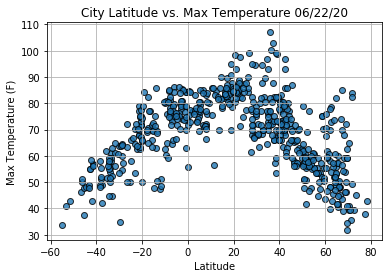

In [33]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

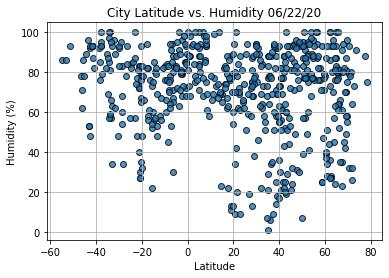

In [38]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

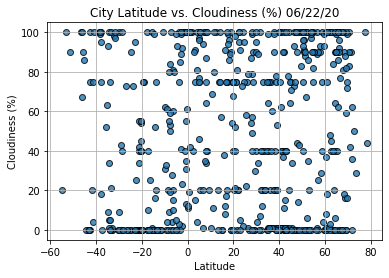

In [39]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

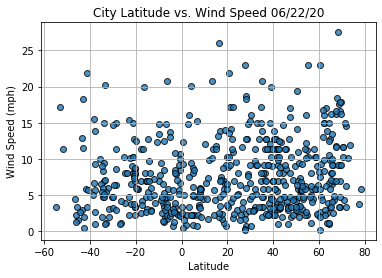

In [40]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()